# Project on Cab Fare Prediction

## Contents
### Introduction
### Assessing the Data
### Cleaning the data
### Feature Engineering
### Exploratory Analysis
### Feature Selection
### Feature Scaling
### Building the model


# Introduction

Problem Statement -
You are a cab rental start-up company. You have successfully run the pilot project and
now want to launch your cab service across the country. You have collected the
historical data from your pilot project and now have a requirement to apply analytics for
fare prediction. You need to design a system that predicts the fare amount for a cab ride
in the city.


> Number of attributes:

> pickup_datetime - timestamp value indicating when the cab ride started.

> pickup_longitude - float for longitude coordinate of where the cab ride started.

> pickup_latitude - float for latitude coordinate of where the cab ride started.

> dropoff_longitude - float for longitude coordinate of where the cab ride ended.

> dropoff_latitude - float for latitude coordinate of where the cab ride ended.

> passenger_count - an integer indicating the number of passengers in the cab
ride.

Missing Values: Yes

Loading the dataset in google colab for processing

In [0]:
from google.colab import files

In [8]:
uploaded = files.upload()

Saving test.csv to test.csv


In [9]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "test.csv" with length 682559 bytes


In [0]:
# Importing relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [0]:
# Reading the training and testing set into a pandas dataframe
train=pd.read_csv('train_cab.csv')

In [0]:
test=pd.read_csv('test.csv')

In [0]:
# Creating a copy of the dataset
df=train.copy()
df1=test.copy()

## Assessing the Data

In [12]:
# Information of the columns both training and testing set
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16067 entries, 0 to 16066
Data columns (total 7 columns):
fare_amount          16043 non-null object
pickup_datetime      16067 non-null object
pickup_longitude     16067 non-null float64
pickup_latitude      16067 non-null float64
dropoff_longitude    16067 non-null float64
dropoff_latitude     16067 non-null float64
passenger_count      16012 non-null float64
dtypes: float64(5), object(2)
memory usage: 878.8+ KB


In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 6 columns):
pickup_datetime      9914 non-null object
pickup_longitude     9914 non-null float64
pickup_latitude      9914 non-null float64
dropoff_longitude    9914 non-null float64
dropoff_latitude     9914 non-null float64
passenger_count      9914 non-null int64
dtypes: float64(4), int64(1), object(1)
memory usage: 464.8+ KB


In [14]:
# First few rows of the training set
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


In [15]:
# Descriptive statistics of the training set
train.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16067.000000,16067.000000,16067.000000,16067.000000,16012.000000
mean,-72.462787,39.914725,-72.462328,39.897906,2.625070
std,10.578384,6.826587,10.575062,6.187087,60.844122
min,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,-73.992156,40.734927,-73.991182,40.734651,1.000000
50%,-73.981698,40.752603,-73.980172,40.753567,1.000000
75%,-73.966838,40.767381,-73.963643,40.768013,2.000000
max,40.766125,401.083332,40.802437,41.366138,5345.000000


In [16]:
# Descriptive srtatistics of the testing set
test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


## Cleaning the data

In [17]:
# Converting the pickup date time column to datime format
train['pickup_datetime'] =  pd.to_datetime(train['pickup_datetime'], format='%Y-%m-%d %H:%M:%S UTC')

ValueError: ignored

> It is evident from the above that the pickup_datetime column contains 43 which is not in date time format,also it is not possible to impute a date time column so we are dropping that particular record from the dataset.

In [0]:
# Doing the same operation for testing set
test['pickup_datetime'] =  pd.to_datetime(test['pickup_datetime'], format='%Y-%m-%d %H:%M:%S UTC')

In [19]:
train[train['pickup_datetime']=='43']

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
1327,11.5,43,-73.981947,40.7282,-73.988582,40.759202,1.0


In [0]:
# Removing the above row from the data set.
train.drop(index=1327,axis=0,inplace=True)

In [21]:
# checking for the above operation
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16066 entries, 0 to 16066
Data columns (total 7 columns):
fare_amount          16042 non-null object
pickup_datetime      16066 non-null object
pickup_longitude     16066 non-null float64
pickup_latitude      16066 non-null float64
dropoff_longitude    16066 non-null float64
dropoff_latitude     16066 non-null float64
passenger_count      16011 non-null float64
dtypes: float64(5), object(2)
memory usage: 1004.1+ KB


In [0]:
# Resetting the index number for training set and dropping the index column simultaneously
train=train.reset_index()
train=train.drop(['index'],axis=1)

In [23]:
# Checking for the above operation
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16066 entries, 0 to 16065
Data columns (total 7 columns):
fare_amount          16042 non-null object
pickup_datetime      16066 non-null object
pickup_longitude     16066 non-null float64
pickup_latitude      16066 non-null float64
dropoff_longitude    16066 non-null float64
dropoff_latitude     16066 non-null float64
passenger_count      16011 non-null float64
dtypes: float64(5), object(2)
memory usage: 878.7+ KB


In [0]:
# Converting the fare_amount column to numeric type with removing all the characters in that column.
train["fare_amount"] = pd.to_numeric(train["fare_amount"],errors = "coerce")

In [25]:
# Checking for the above operation
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16066 entries, 0 to 16065
Data columns (total 7 columns):
fare_amount          16041 non-null float64
pickup_datetime      16066 non-null object
pickup_longitude     16066 non-null float64
pickup_latitude      16066 non-null float64
dropoff_longitude    16066 non-null float64
dropoff_latitude     16066 non-null float64
passenger_count      16011 non-null float64
dtypes: float64(6), object(1)
memory usage: 878.7+ KB


In [26]:
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16041.000000,16066.000000,16066.000000,16066.000000,16066.000000,16011.000000
mean,15.015223,-72.462693,39.914675,-72.462233,39.897852,2.625171
std,430.474362,10.578707,6.826797,10.575384,6.187276,60.846021
min,-3.000000,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,6.000000,-73.992156,40.734935,-73.991182,40.734647,1.000000
50%,8.500000,-73.981697,40.752605,-73.980170,40.753566,1.000000
75%,12.500000,-73.966837,40.767381,-73.963642,40.768015,2.000000
max,54343.000000,40.766125,401.083332,40.802437,41.366138,5345.000000


In [0]:
# From the descriptive statistics it is clear that maximum value of latitude is exceeding 90 which is not possible so removing all the records having maximum value greater than 90.  
train = train.drop((train[train['pickup_latitude']>90]).index, axis=0)

In [0]:
# Resetting the row index
train=train.reset_index(drop=True)

In [0]:
# Dropping all records containing more than 6 passengers as more than five passengers are not possible in a cab
train = train.drop((train[train['passenger_count']>6]).index, axis=0)

In [0]:
# Resetting the row index for training set.
train=train.reset_index(drop=True)

In [0]:
# Dropping all records containing 0 passengers as zero passengers are not possible in a cab in a ride
train = train.drop((train[train['passenger_count']==0]).index, axis=0)

In [0]:
# Resetting the row index for training set.
train=train.reset_index(drop=True)

In [0]:
# Dropping all records containing containing negative fareamount which is not possible.
train = train.drop((train[train['fare_amount']<0]).index, axis=0)

In [0]:
# Resetting the row index for training set.
train=train.reset_index(drop=True)

In [35]:
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,15961.000000,15985.000000,15985.000000,15985.000000,15985.000000,15930.000000
mean,15.048142,-72.473549,39.898117,-72.463841,39.898642,1.649556
std,431.551446,10.542817,6.186941,10.570583,6.186568,1.265934
min,0.000000,-74.438233,-74.006893,-74.429332,-74.006377,0.120000
25%,6.000000,-73.992157,40.734945,-73.991182,40.734700,1.000000
50%,8.500000,-73.981696,40.752633,-73.980167,40.753577,1.000000
75%,12.500000,-73.966835,40.767392,-73.963643,40.768026,2.000000
max,54343.000000,40.766125,41.366138,40.802437,41.366138,6.000000


In [36]:
# Checking for above operations
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15985 entries, 0 to 15984
Data columns (total 7 columns):
fare_amount          15961 non-null float64
pickup_datetime      15985 non-null object
pickup_longitude     15985 non-null float64
pickup_latitude      15985 non-null float64
dropoff_longitude    15985 non-null float64
dropoff_latitude     15985 non-null float64
passenger_count      15930 non-null float64
dtypes: float64(6), object(1)
memory usage: 874.3+ KB


> Missing Value Analysis

In [0]:
# Creating a list of continuous variables having null values
miss_val=['fare_amount','passenger_count']

In [38]:
train.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [0]:
k=train[['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count']]

In [40]:
# Importing KNN 
from fancyimpute import KNN

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
Using TensorFlow backend.


In [0]:
# Function for KNN imputation
def knn(t,j):
    z=t
    z.loc[0,j]=np.NaN
    z=pd.DataFrame(KNN(k=3).fit_transform(z),columns=z.columns)
    return(z.loc[0,j])

In [0]:
# Function for imputation using mean value.
def mean(t,j):
    z=t
    z.loc[0,j]=np.NaN
    z=z.loc[:,j].fillna(z.loc[:,j].mean())
    return(z[0])

In [0]:
# Function for imputation using median value.
def median(t,j):
    z=t
    z.loc[0,j]=np.NaN
    z=z.loc[:,j].fillna(z.loc[:,j].median())
    return(z[0])

In [0]:
# Function for imputing the missing values.
# Here we have first stored a non null value of a particular column stored it in a separate variable and replaced it in the dataframe with nan.
# Then we have imputed the missing value using the mean and median and depending upon which method imputes the value closes to the actual value is used for imputing the missing values in the dataset.
def impute(t):
    for j in miss_val:
            if(sum(t.loc[:,j].isnull())!=0):
                p=mean(t,j)
                q=median(t,j)
                r=knn(t,j)
                if(abs(p-t.loc[0,j]) < abs(q-t.loc[0,j]) and abs(p-t.loc[0,j]) < abs(r-t.loc[0,j])):
                    t.loc[:,j]=t.loc[:,j].fillna(t.loc[:,j].mean())
                elif(abs(q-t.loc[0,j]) < abs(p-t.loc[0,j]) and abs(q-t.loc[0,j]) < abs(r-t.loc[0,j])):
                    t.loc[:,j]=t.loc[:,j].fillna(t.loc[:,j].median())
                else:
                    t=pd.DataFrame(KNN(k=3).fit_transform(t),columns=t.columns)
            else:
                continue
    return(t)

In [45]:
# Imputing the missing values for the two columns
k=impute(k)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Imputing row 1/15985 with 1 missing, elapsed time: 34.539
Imputing row 101/15985 with 0 missing, elapsed time: 34.541
Imputing row 201/15985 with 0 missing, elapsed time: 34.542
Imputing row 301/15985 with 0 missing, elapsed time: 34.542
Imputing row 401/15985 with 0 missing, elapsed time: 34.543
Imputing row 501/15985 with 0 missing, elapsed time: 34.544
Imputing row 601/15985 with 0 missing, elapsed time: 34.545
Imputing row 701/15985 with 0 missing, elapsed time: 34.545
Imputing row 801/15985 with 0 missing, elapsed time: 34.546
Imputing row 901/15985 with 0 missing, elapsed time: 34.547
Imputing row 1001/15985 with 0 missing, elapsed time: 34.547
Imputing row 1101/15985 with 0 missing, elapsed time: 34.547
Imputing row 1201/15985 with 0 missing, elapsed time: 34.548
Imputing row 1301/15985 with 0 missing, elapsed time: 34.548
Imputing row 1401/15985 with 0 missing, elapsed time: 34.549
Imputing row 1501/15985 with 0 missing, elapsed time: 34.549
Imputing row 1601/15985 with 0 missi

In [46]:
# Checking for the above operation
k.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15985 entries, 0 to 15984
Data columns (total 6 columns):
fare_amount          15985 non-null float64
pickup_longitude     15985 non-null float64
pickup_latitude      15985 non-null float64
dropoff_longitude    15985 non-null float64
dropoff_latitude     15985 non-null float64
passenger_count      15985 non-null float64
dtypes: float64(6)
memory usage: 749.4 KB


In [47]:
k.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [48]:
k.head(3)

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,8.046398,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.900000,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.700000,-73.982738,40.761270,-73.991242,40.750562,2.0


In [49]:
k.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,15985.000000,15985.000000,15985.000000,15985.000000,15985.000000,15985.000000
mean,15.041784,-72.473549,39.898117,-72.463841,39.898642,1.650174
std,431.227469,10.542817,6.186941,10.570583,6.186568,1.265059
min,0.000000,-74.438233,-74.006893,-74.429332,-74.006377,0.120000
25%,6.000000,-73.992157,40.734945,-73.991182,40.734700,1.000000
50%,8.500000,-73.981696,40.752633,-73.980167,40.753577,1.000000
75%,12.500000,-73.966835,40.767392,-73.963643,40.768026,2.000000
max,54343.000000,40.766125,41.366138,40.802437,41.366138,6.000000


In [0]:
k['pickup_datetime']=train['pickup_datetime']

In [0]:
# Saving the imputed values in the original dataset
train.loc[:,['fare_amount', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'passenger_count']]=k.loc[:,['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count']]

In [52]:
# Checking for the above operation
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15985 entries, 0 to 15984
Data columns (total 7 columns):
fare_amount          15985 non-null float64
pickup_datetime      15985 non-null object
pickup_longitude     15985 non-null float64
pickup_latitude      15985 non-null float64
dropoff_longitude    15985 non-null float64
dropoff_latitude     15985 non-null float64
passenger_count      15985 non-null float64
dtypes: float64(6), object(1)
memory usage: 874.3+ KB


In [0]:
# Dropping all records containing fraction as passenger count as fractional passengers are not possible in a cab in a ride
train = train.drop((train[train['passenger_count']==0.12]).index, axis=0)

In [0]:
# Resetting the row index for training set.
train=train.reset_index(drop=True)

In [55]:
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,15984.000000,15984.000000,15984.000000,15984.000000,15984.000000,15984.00000
mean,15.042006,-72.473455,39.898064,-72.463745,39.898591,1.65027
std,431.240958,10.543141,6.187131,10.570907,6.186758,1.26504
min,0.000000,-74.438233,-74.006893,-74.429332,-74.006377,1.00000
25%,6.000000,-73.992157,40.734944,-73.991182,40.734701,1.00000
50%,8.500000,-73.981697,40.752633,-73.980166,40.753580,1.00000
75%,12.500000,-73.966834,40.767395,-73.963643,40.768027,2.00000
max,54343.000000,40.766125,41.366138,40.802437,41.366138,6.00000


In [0]:
# Converting the pickup_datetime column into date time type
train['pickup_datetime'] =  pd.to_datetime(train['pickup_datetime'], format='%Y-%m-%d %H:%M:%S UTC')
# Extracting date, hour, month and year from the date time column and saving it into a new a column accordingly
train['year'] = train['pickup_datetime'].dt.year
train['Month'] = train['pickup_datetime'].dt.month
train['Date'] = train['pickup_datetime'].dt.day
train['Day'] = train['pickup_datetime'].dt.dayofweek
train['Hour'] = train['pickup_datetime'].dt.hour

In [0]:
# Extracting date, hour, month and year from the date time column and saving it into a new a column accordingly similarly for testing set.
test['year'] = test['pickup_datetime'].dt.year
test['Month'] = test['pickup_datetime'].dt.month
test['Date'] = test['pickup_datetime'].dt.day
test['Day'] = test['pickup_datetime'].dt.dayofweek
test['Hour'] = test['pickup_datetime'].dt.hour

In [58]:
# Checking for the above operation in training and testing sets respectively.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15984 entries, 0 to 15983
Data columns (total 12 columns):
fare_amount          15984 non-null float64
pickup_datetime      15984 non-null datetime64[ns]
pickup_longitude     15984 non-null float64
pickup_latitude      15984 non-null float64
dropoff_longitude    15984 non-null float64
dropoff_latitude     15984 non-null float64
passenger_count      15984 non-null float64
year                 15984 non-null int64
Month                15984 non-null int64
Date                 15984 non-null int64
Day                  15984 non-null int64
Hour                 15984 non-null int64
dtypes: datetime64[ns](1), float64(6), int64(5)
memory usage: 1.5 MB


In [59]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 11 columns):
pickup_datetime      9914 non-null datetime64[ns]
pickup_longitude     9914 non-null float64
pickup_latitude      9914 non-null float64
dropoff_longitude    9914 non-null float64
dropoff_latitude     9914 non-null float64
passenger_count      9914 non-null int64
year                 9914 non-null int64
Month                9914 non-null int64
Date                 9914 non-null int64
Day                  9914 non-null int64
Hour                 9914 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(6)
memory usage: 852.1 KB


In [0]:
train['passenger_count']=train['passenger_count'].astype(int)
test['passenger_count']=test['passenger_count'].astype(int)

In [61]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15984 entries, 0 to 15983
Data columns (total 12 columns):
fare_amount          15984 non-null float64
pickup_datetime      15984 non-null datetime64[ns]
pickup_longitude     15984 non-null float64
pickup_latitude      15984 non-null float64
dropoff_longitude    15984 non-null float64
dropoff_latitude     15984 non-null float64
passenger_count      15984 non-null int64
year                 15984 non-null int64
Month                15984 non-null int64
Date                 15984 non-null int64
Day                  15984 non-null int64
Hour                 15984 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(6)
memory usage: 1.5 MB


In [0]:
# Converting the year, day, month columns to str type for both training and testing set as they are categorical type values.
train['year']=train['year'].astype(str)
train['Month']=train['Month'].astype(str)
train['Day']=train['Day'].astype(str)
test['year']=test['year'].astype(str)
test['Month']=test['Month'].astype(str)
test['Day']=test['Day'].astype(str)

In [63]:
# Checking the remaining records in the dataset.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15984 entries, 0 to 15983
Data columns (total 12 columns):
fare_amount          15984 non-null float64
pickup_datetime      15984 non-null datetime64[ns]
pickup_longitude     15984 non-null float64
pickup_latitude      15984 non-null float64
dropoff_longitude    15984 non-null float64
dropoff_latitude     15984 non-null float64
passenger_count      15984 non-null int64
year                 15984 non-null object
Month                15984 non-null object
Date                 15984 non-null int64
Day                  15984 non-null object
Hour                 15984 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(3), object(3)
memory usage: 1.5+ MB


In [0]:
# Resetting the row index for testing set.
test=test.reset_index(drop=True)

In [65]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 11 columns):
pickup_datetime      9914 non-null datetime64[ns]
pickup_longitude     9914 non-null float64
pickup_latitude      9914 non-null float64
dropoff_longitude    9914 non-null float64
dropoff_latitude     9914 non-null float64
passenger_count      9914 non-null int64
year                 9914 non-null object
Month                9914 non-null object
Date                 9914 non-null int64
Day                  9914 non-null object
Hour                 9914 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(3), object(3)
memory usage: 852.1+ KB


In [0]:
# Creating list of continuous columns
cnames=['fare_amount','pickup_latitude','pickup_longitude','dropoff_longitude','dropoff_latitude']

> Below boxplot for every continuous variable has been plotted so as to determine outliers if any.

Text(0, 0.5, 'Values')

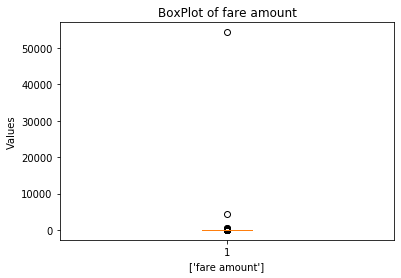

In [67]:
plt.boxplot(train['fare_amount'])
plt.xlabel(['fare amount'])
plt.title("BoxPlot of fare amount")
plt.ylabel('Values')

Text(0, 0.5, 'Values')

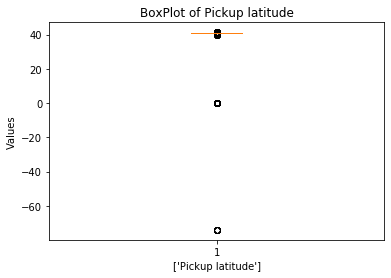

In [68]:
plt.boxplot(train['pickup_latitude'])
plt.xlabel(['Pickup latitude'])
plt.title("BoxPlot of Pickup latitude")
plt.ylabel('Values')

Text(0, 0.5, 'Values')

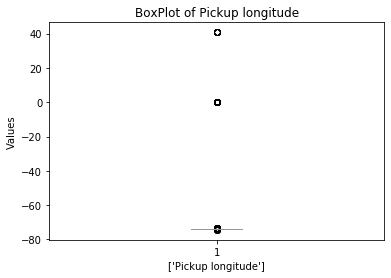

In [69]:
plt.boxplot(train['pickup_longitude'])
plt.xlabel(['Pickup longitude'])
plt.title("BoxPlot of Pickup longitude")
plt.ylabel('Values')

Text(0, 0.5, 'Values')

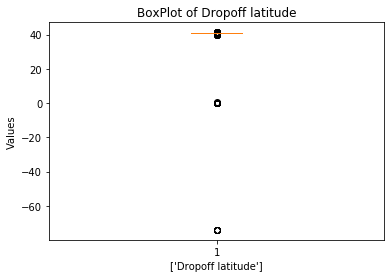

In [70]:
plt.boxplot(train['dropoff_latitude'])
plt.xlabel(['Dropoff latitude'])
plt.title("BoxPlot of Dropoff latitude")
plt.ylabel('Values')

Text(0, 0.5, 'Values')

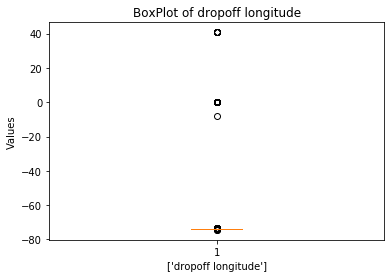

In [71]:
plt.boxplot(train['dropoff_longitude'])
plt.xlabel(['dropoff longitude'])
plt.title("BoxPlot of dropoff longitude")
plt.ylabel('Values')

> Boxplot for every continuous column in the testing set

Text(0, 0.5, 'Values')

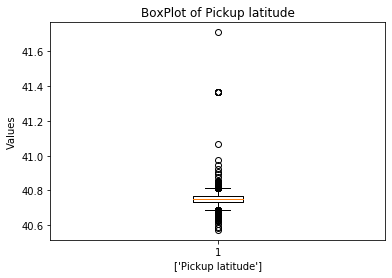

In [72]:
plt.boxplot(test['pickup_latitude'])
plt.xlabel(['Pickup latitude'])
plt.title("BoxPlot of Pickup latitude")
plt.ylabel('Values')

Text(0, 0.5, 'Values')

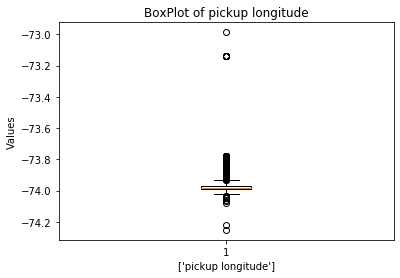

In [73]:
plt.boxplot(test['pickup_longitude'])
plt.xlabel(['pickup longitude'])
plt.title("BoxPlot of pickup longitude")
plt.ylabel('Values')

Text(0, 0.5, 'Values')

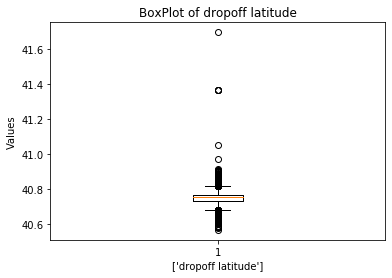

In [74]:
plt.boxplot(test['dropoff_latitude'])
plt.xlabel(['dropoff latitude'])
plt.title("BoxPlot of dropoff latitude")
plt.ylabel('Values')

Text(0, 0.5, 'Values')

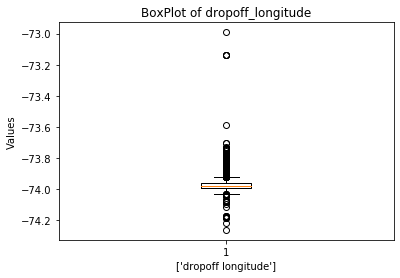

In [75]:
plt.boxplot(test['dropoff_longitude'])
plt.xlabel(['dropoff longitude'])
plt.title("BoxPlot of dropoff_longitude")
plt.ylabel('Values')

### Outlier Analysis Using Capping and Flooring method
> Here we have defined outliers as some value which is greater than q75+1.5*iqr or less than q25-1.5*iqr, where q75,q25 is the 75th and 25th percentile of the given continnuous variable,iqr the inter-quartile range of that variable.

> In the flooring and capping method of outliers analysis we replace those values exceeding q75+1.5*iqr with q75+1.5*iqr and those below q25-1.5*iqr with q25-1.5*iqr.

In [0]:
def outlier_analysis(t,c):
    q75,q25=np.percentile(t[c],[75,25])
    iqr=q75-q25
    min=q25-(iqr*1.5)
    max=q75+(iqr*1.5)
    for i in range(t.shape[0]):
        if(t.loc[i,c] > max):
            t.loc[i,c]=max
        elif(t.loc[i,c] < min):
            t.loc[i,c]=min  
    return(t)

In [0]:
# Creating a list of variables having outliers.
out_var=['dropoff_latitude', 'dropoff_longitude', 'fare_amount', 'pickup_latitude', 'pickup_longitude']

In [0]:
# Removing outliers form the training set.
for i in out_var:
    train=outlier_analysis(train,i)

In [79]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15984 entries, 0 to 15983
Data columns (total 12 columns):
fare_amount          15984 non-null float64
pickup_datetime      15984 non-null datetime64[ns]
pickup_longitude     15984 non-null float64
pickup_latitude      15984 non-null float64
dropoff_longitude    15984 non-null float64
dropoff_latitude     15984 non-null float64
passenger_count      15984 non-null int64
year                 15984 non-null object
Month                15984 non-null object
Date                 15984 non-null int64
Day                  15984 non-null object
Hour                 15984 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(3), object(3)
memory usage: 1.5+ MB


In [0]:
# List of variables containing outliers in the testing set.
out_var=['dropoff_latitude', 'dropoff_longitude', 'pickup_latitude', 'pickup_longitude']

In [0]:
# Removing outliers form the training set.
for i in out_var:
    test=outlier_analysis(test,i)

In [82]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 11 columns):
pickup_datetime      9914 non-null datetime64[ns]
pickup_longitude     9914 non-null float64
pickup_latitude      9914 non-null float64
dropoff_longitude    9914 non-null float64
dropoff_latitude     9914 non-null float64
passenger_count      9914 non-null int64
year                 9914 non-null object
Month                9914 non-null object
Date                 9914 non-null int64
Day                  9914 non-null object
Hour                 9914 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(3), object(3)
memory usage: 852.1+ KB


## Feature Engineering

> Here using the the four latitudes and longitudes distance travelled in meters has been calculated by the cab. Haversine formula has been used.

In [0]:
# Importing relevant libraries
from math import radians, cos, sin, asin, sqrt

In [0]:
# Function for calculating distance using two set of latitudes and longitudes.
def distance(lat1, lat2, lon1, lon2): 
    lon1 = radians(lon1) 
    lon2 = radians(lon2) 
    lat1 = radians(lat1) 
    lat2 = radians(lat2) 
       
    # Haversine formula  
    dlon = lon2 - lon1  
    dlat = lat2 - lat1 
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * asin(sqrt(a))  
    # Radius of earth in kilometers. 
    r = 6371 
    return(c * r)

In [0]:
# Calculating distance for training set records
for i in range(train.shape[0]):
    train.loc[i,'distance']=distance(train.loc[i,'pickup_latitude'],train.loc[i,'dropoff_latitude'],train.loc[i,'pickup_longitude'],train.loc[i,'dropoff_longitude'])

In [0]:
# Calculating distance for testing set records
for i in range(test.shape[0]):
    test.loc[i,'distance']=distance(test.loc[i,'pickup_latitude'],test.loc[i,'dropoff_latitude'],test.loc[i,'pickup_longitude'],test.loc[i,'dropoff_longitude'])

In [0]:
# Dropping the four columns of latitude and longitude from both training and testing sets.
train=train.drop(['dropoff_latitude', 'dropoff_longitude', 'pickup_latitude', 'pickup_longitude'],axis=1)

In [0]:
test=test.drop(['dropoff_latitude', 'dropoff_longitude', 'pickup_latitude', 'pickup_longitude'],axis=1)

In [89]:
# Checking for the above operation
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15984 entries, 0 to 15983
Data columns (total 9 columns):
fare_amount        15984 non-null float64
pickup_datetime    15984 non-null datetime64[ns]
passenger_count    15984 non-null int64
year               15984 non-null object
Month              15984 non-null object
Date               15984 non-null int64
Day                15984 non-null object
Hour               15984 non-null int64
distance           15984 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 1.1+ MB


In [90]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 8 columns):
pickup_datetime    9914 non-null datetime64[ns]
passenger_count    9914 non-null int64
year               9914 non-null object
Month              9914 non-null object
Date               9914 non-null int64
Day                9914 non-null object
Hour               9914 non-null int64
distance           9914 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 619.8+ KB


> Adding a new column Time of day in both training and testing set. Here I have divided the entire day in four sections depending upon the pickup hour of the passenger

> 3am to 9am: Morning

> 9am to 3pm: Day

> 3pm to 9pm: Evening

> 9pm to 2am: Night

In [0]:
# Adding a new column time of day in training set
for i in range(train.shape[0]):
    if(train.loc[i,'Hour']>3 and train.loc[i,'Hour']<=9):
        train.loc[i,'Time_of_day']='Morning'
    elif(train.loc[i,'Hour']>9 and train.loc[i,'Hour']<=15):
        train.loc[i,'Time_of_day']='Day'
    elif(train.loc[i,'Hour']>15 and train.loc[i,'Hour']<=21):
        train.loc[i,'Time_of_day']='Evening'
    elif(train.loc[i,'Hour']>21 or train.loc[i,'Hour']<=3):
        train.loc[i,'Time_of_day']='Night'    

In [0]:
# Adding a new column time of day in testing set
for i in range(test.shape[0]):
    if(test.loc[i,'Hour']>3 and test.loc[i,'Hour']<=9):
        test.loc[i,'Time_of_day']='Morning'
    elif(test.loc[i,'Hour']>9 and test.loc[i,'Hour']<=15):
        test.loc[i,'Time_of_day']='Day'
    elif(test.loc[i,'Hour']>15 and test.loc[i,'Hour']<=21):
        test.loc[i,'Time_of_day']='Evening'
    elif(test.loc[i,'Hour']>21 or test.loc[i,'Hour']<=3):
        test.loc[i,'Time_of_day']='Night'  

## Exploratory Analysis

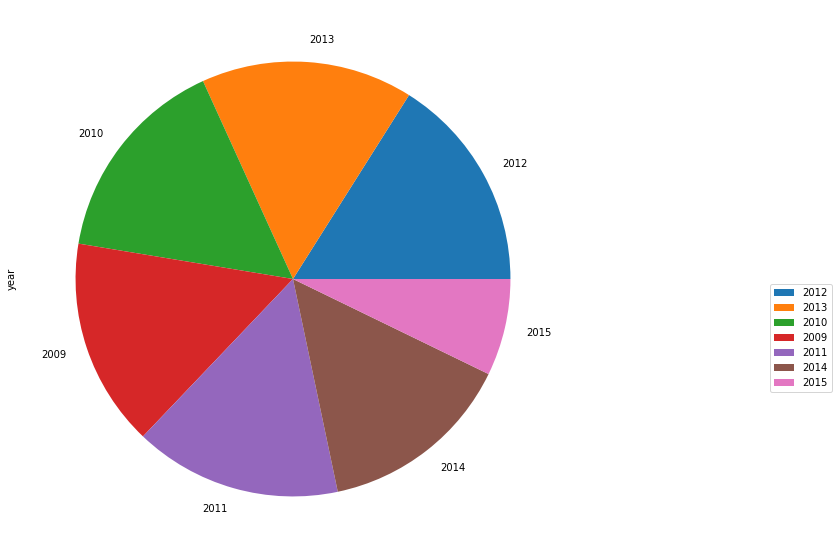

In [93]:
k=train['year'].value_counts()
k.plot(kind='pie',figsize=(20,10),legend=True)
plt.legend(loc=0,bbox_to_anchor=(1.5,0.5));

> From the above pie of year ir is clear that the data set contains approximately equal proportion of data from every year.

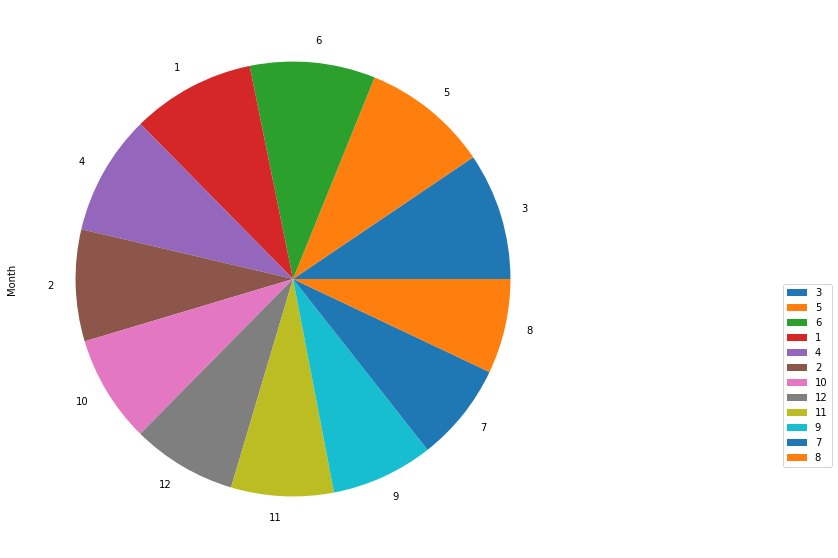

In [94]:
k=train['Month'].value_counts()
k.plot(kind='pie',figsize=(20,10),legend=True)
plt.legend(loc=0,bbox_to_anchor=(1.5,0.5));

> From the above pie chart it is clear that approximately every month has equal contribution.

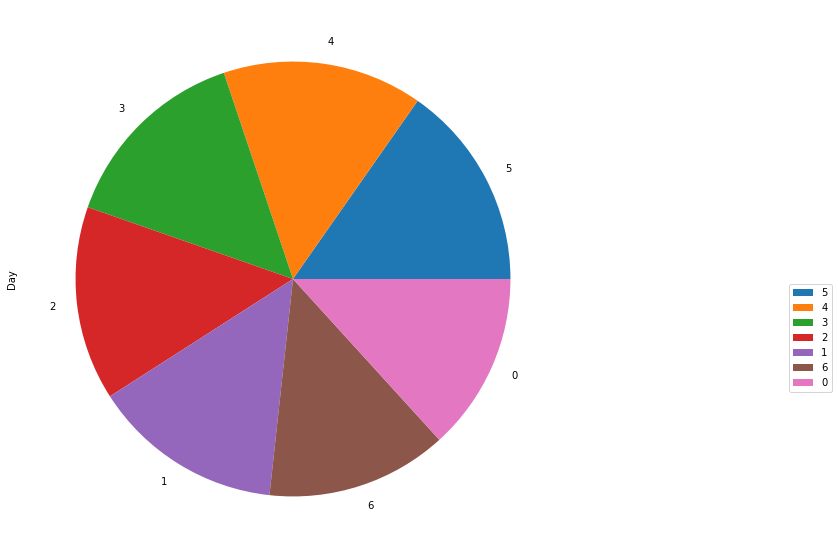

In [95]:
k=train['Day'].value_counts()
k.plot(kind='pie',figsize=(20,10),legend=True)
plt.legend(loc=0,bbox_to_anchor=(1.5,0.5));

> From the above pie chart every day of the appears to be in almost same proportion in the dataset.

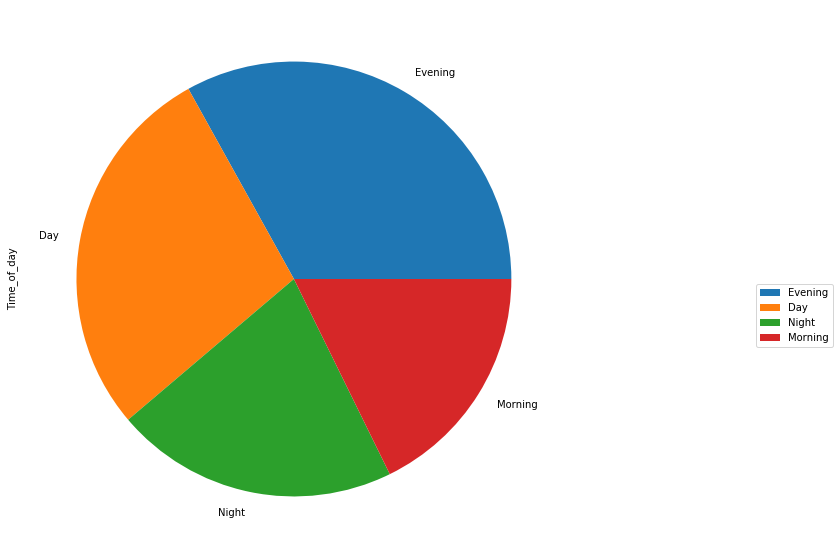

In [96]:
k=train['Time_of_day'].value_counts()
k.plot(kind='pie',figsize=(20,10),legend=True)
plt.legend(loc=0,bbox_to_anchor=(1.5,0.5));

> From the above pie chart it is clear that majority rides took place in the evening, followed by Day and Night.

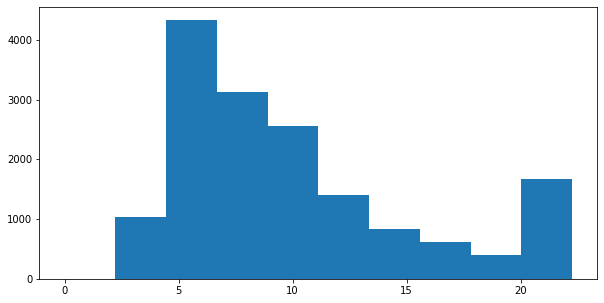

In [97]:
plt.figure(figsize=[10,5])
plt.hist(x='fare_amount',data=train);

> From above histogram of fare amonut is is clear that it varies between 2 to more than 20 approximately.

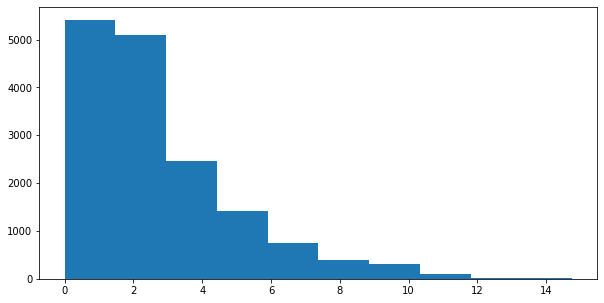

In [98]:
plt.figure(figsize=[10,5])
plt.hist(x='distance',data=train);

> From above histogram it is clear that the distance column is right skewed.

In [99]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15984 entries, 0 to 15983
Data columns (total 10 columns):
fare_amount        15984 non-null float64
pickup_datetime    15984 non-null datetime64[ns]
passenger_count    15984 non-null int64
year               15984 non-null object
Month              15984 non-null object
Date               15984 non-null int64
Day                15984 non-null object
Hour               15984 non-null int64
distance           15984 non-null float64
Time_of_day        15984 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 1.2+ MB


> As both the above continuous variable has skewed data thus normalising it.

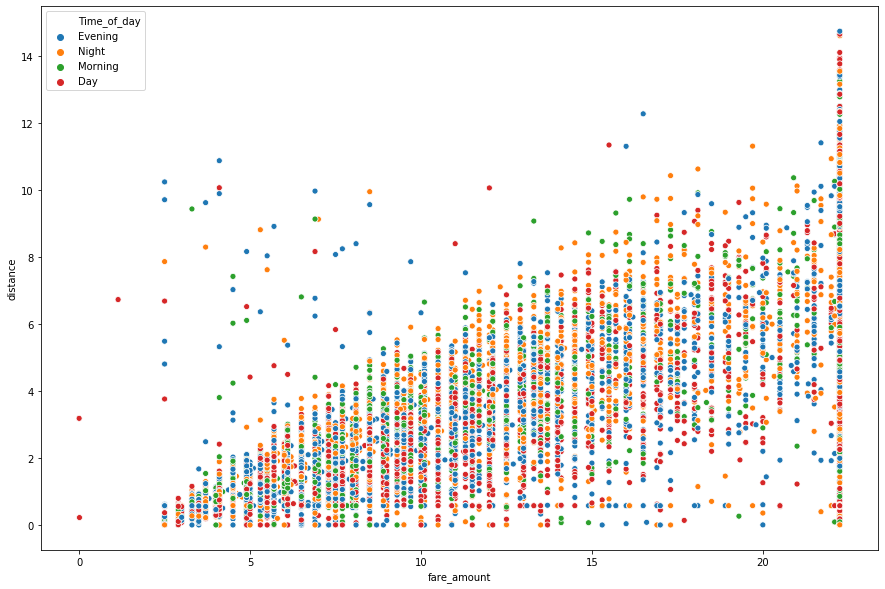

In [100]:
plt.figure(figsize=[15,10])
sb.scatterplot(x='fare_amount',y='distance',hue='Time_of_day',data=train)
plt.legend(loc='best');

> The figure above shows scatter plot between distance and fare amount with hue as time of day. It is clear that majority of cab rides occur in Evening followed by Day and Night.

In [0]:
# Creating a list of continuous variables
cnames=['distance']

In [0]:
for i in cnames:
    train[i] = (train[i] - train[i].min())/(train[i].max()-train[i].min())

In [0]:
for i in cnames:
    test[i] = (test[i] - test[i].min())/(test[i].max()-test[i].min())

## Feature Selection
> Here  correlation plot has been drawn among all the continuous variables

In [0]:
d1=train[['distance','fare_amount','passenger_count']]

In [105]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15984 entries, 0 to 15983
Data columns (total 3 columns):
distance           15984 non-null float64
fare_amount        15984 non-null float64
passenger_count    15984 non-null int64
dtypes: float64(2), int64(1)
memory usage: 374.8 KB


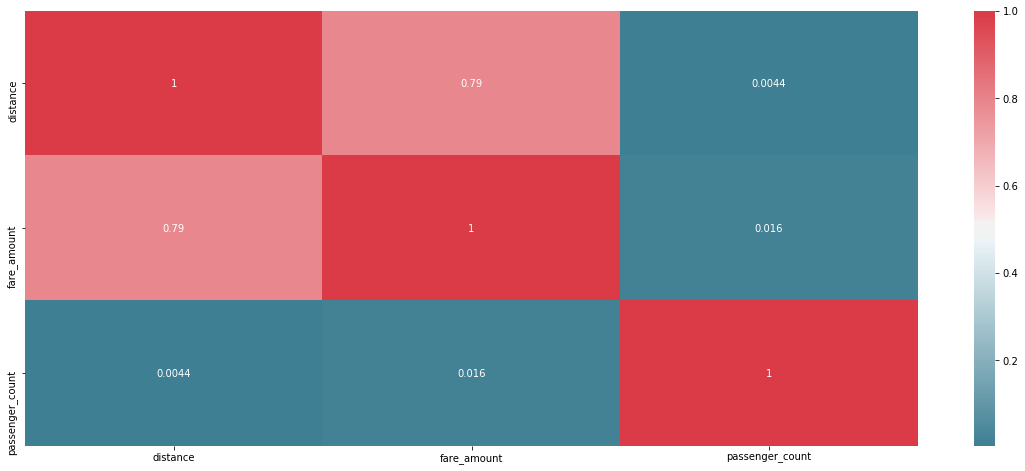

In [106]:
import seaborn as sb
f, ax = plt.subplots(figsize=(20, 8))
corr = d1.corr()
sb.heatmap(corr, mask=np.zeros_like(corr,dtype=np.bool),cmap=sb.diverging_palette(220, 10, as_cmap=True),annot=True,ax=ax,);

> From the above heatmap it is clear that fare amount has a high correlation coefficient of 0.79 with distance. 

In [0]:
# Replacing string with integers for calculating anova with fare amount
train['Time_of_day']=train['Time_of_day'].map({'Morning':0,'Day':1,'Evening':2,'Night':3})

In [0]:
test['Time_of_day']=test['Time_of_day'].map({'Morning':0,'Day':1,'Evening':2,'Night':3})

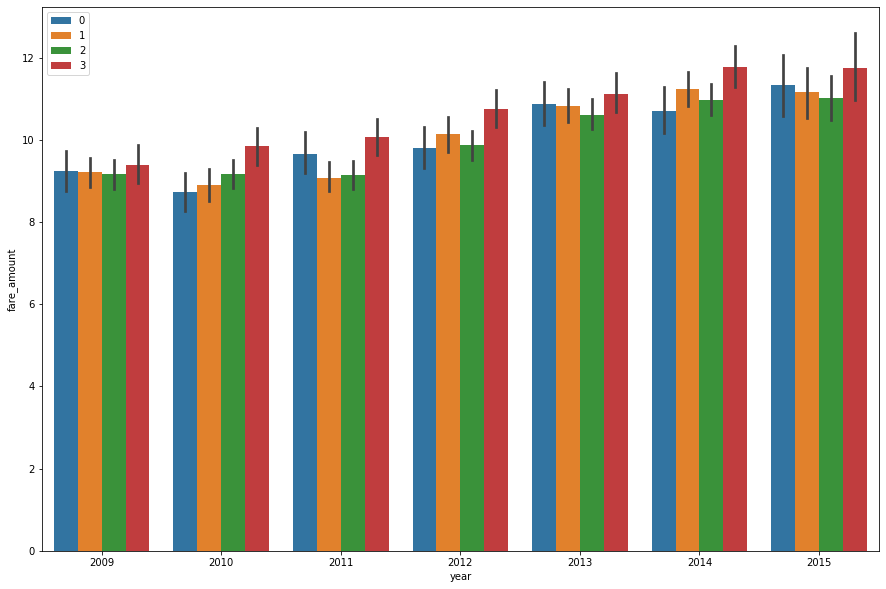

In [109]:
plt.figure(figsize=[15,10])
sb.barplot(y='fare_amount',x='year',hue='Time_of_day',data=train)
plt.legend(loc='best');

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
No handles with labels found to put in legend.


<Figure size 1080x720 with 0 Axes>

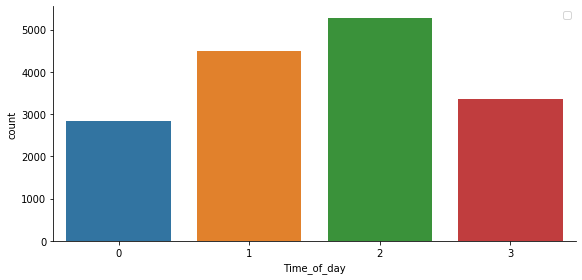

In [110]:
plt.figure(figsize=[15,10])
sb.factorplot(data=train, x='Time_of_day', kind= 'count',size=4,aspect=2)
plt.legend(loc='best');

In [0]:
train['Time_of_day']=train['Time_of_day'].astype(str)
test['Time_of_day']=test['Time_of_day'].astype(str)

In [112]:
# Calculating one-way anova for categorical variables with fare amount
from scipy import stats
cat_names=['Month','Day','Time_of_day','year']
for i in cat_names:
    f, p = stats.f_oneway(train[i], train['fare_amount'])
    print("P value for variable "+str(i)+" is "+str(p))

P value for variable Month is 0.0
P value for variable Day is 0.0
P value for variable Time_of_day is 0.0
P value for variable year is 0.0


> From above it is clear that all the categorical variables have p-value as zero this null hypothesis for each of them is rejected.

In [113]:
train.columns

Index(['fare_amount', 'pickup_datetime', 'passenger_count', 'year', 'Month',
       'Date', 'Day', 'Hour', 'distance', 'Time_of_day'],
      dtype='object')

In [114]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15984 entries, 0 to 15983
Data columns (total 10 columns):
fare_amount        15984 non-null float64
pickup_datetime    15984 non-null datetime64[ns]
passenger_count    15984 non-null int64
year               15984 non-null object
Month              15984 non-null object
Date               15984 non-null int64
Day                15984 non-null object
Hour               15984 non-null int64
distance           15984 non-null float64
Time_of_day        15984 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 1.2+ MB


In [115]:
train.describe()

,fare_amount,passenger_count,Date,Hour,distance
count,15984.000000,15984.000000,15984.000000,15984.000000,15984.000000
mean,10.069763,1.648836,15.667042,13.494620,0.189116
std,5.461179,1.264889,8.685082,6.520565,0.151879
min,0.000000,0.000000,1.000000,0.000000,0.000000
25%,6.000000,1.000000,8.000000,9.000000,0.081402
50%,8.500000,1.000000,16.000000,14.000000,0.142080
75%,12.500000,2.000000,23.000000,19.000000,0.251688
max,22.250000,6.000000,31.000000,23.000000,1.000000


In [0]:
# Dropping all records containing 0 passengers as zero passengers are not possible in a cab in a ride
train = train.drop((train[train['passenger_count']==0]).index, axis=0)

In [0]:
# Resetting the row index for training set.
train=train.reset_index(drop=True)

In [118]:
train.describe()

,fare_amount,passenger_count,Date,Hour,distance
count,15980.000000,15980.000000,15980.000000,15980.000000,15980.000000
mean,10.069699,1.649249,15.666959,13.494556,0.189117
std,5.461799,1.264778,8.685555,6.521012,0.151892
min,0.000000,1.000000,1.000000,0.000000,0.000000
25%,6.000000,1.000000,8.000000,9.000000,0.081399
50%,8.500000,1.000000,16.000000,14.000000,0.142080
75%,12.500000,2.000000,23.000000,19.000000,0.251684
max,22.250000,6.000000,31.000000,23.000000,1.000000


## Building the Model

In [0]:
# Creating list of categorical variables
cat_names=['Month','Day','Time_of_day','year']

In [0]:
# Adding dummies for categorical variables and simlutaneously deleting the first dummy variable so as to avoid
# linear dependency for both training and testing set.
d1=pd.get_dummies(data=train,columns=cat_names,drop_first=True)

In [0]:
d2=pd.get_dummies(data=test,columns=cat_names,drop_first=True)

In [0]:
# Splitting the the dataset into training and testing set.
from sklearn.model_selection import train_test_split

In [123]:
d1.columns

Index(['fare_amount', 'pickup_datetime', 'passenger_count', 'Date', 'Hour',
       'distance', 'Month_10', 'Month_11', 'Month_12', 'Month_2', 'Month_3',
       'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_8', 'Month_9',
       'Day_1', 'Day_2', 'Day_3', 'Day_4', 'Day_5', 'Day_6', 'Time_of_day_1',
       'Time_of_day_2', 'Time_of_day_3', 'year_2010', 'year_2011', 'year_2012',
       'year_2013', 'year_2014', 'year_2015'],
      dtype='object')

In [124]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15980 entries, 0 to 15979
Data columns (total 32 columns):
fare_amount        15980 non-null float64
pickup_datetime    15980 non-null datetime64[ns]
passenger_count    15980 non-null int64
Date               15980 non-null int64
Hour               15980 non-null int64
distance           15980 non-null float64
Month_10           15980 non-null uint8
Month_11           15980 non-null uint8
Month_12           15980 non-null uint8
Month_2            15980 non-null uint8
Month_3            15980 non-null uint8
Month_4            15980 non-null uint8
Month_5            15980 non-null uint8
Month_6            15980 non-null uint8
Month_7            15980 non-null uint8
Month_8            15980 non-null uint8
Month_9            15980 non-null uint8
Day_1              15980 non-null uint8
Day_2              15980 non-null uint8
Day_3              15980 non-null uint8
Day_4              15980 non-null uint8
Day_5              15980 non-null uint

In [125]:
d1.columns

Index(['fare_amount', 'pickup_datetime', 'passenger_count', 'Date', 'Hour',
       'distance', 'Month_10', 'Month_11', 'Month_12', 'Month_2', 'Month_3',
       'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_8', 'Month_9',
       'Day_1', 'Day_2', 'Day_3', 'Day_4', 'Day_5', 'Day_6', 'Time_of_day_1',
       'Time_of_day_2', 'Time_of_day_3', 'year_2010', 'year_2011', 'year_2012',
       'year_2013', 'year_2014', 'year_2015'],
      dtype='object')

In [126]:
d2.columns

Index(['pickup_datetime', 'passenger_count', 'Date', 'Hour', 'distance',
       'Month_10', 'Month_11', 'Month_12', 'Month_2', 'Month_3', 'Month_4',
       'Month_5', 'Month_6', 'Month_7', 'Month_8', 'Month_9', 'Day_1', 'Day_2',
       'Day_3', 'Day_4', 'Day_5', 'Day_6', 'Time_of_day_1', 'Time_of_day_2',
       'Time_of_day_3', 'year_2010', 'year_2011', 'year_2012', 'year_2013',
       'year_2014', 'year_2015'],
      dtype='object')

In [127]:
test.columns

Index(['pickup_datetime', 'passenger_count', 'year', 'Month', 'Date', 'Day',
       'Hour', 'distance', 'Time_of_day'],
      dtype='object')

In [0]:
test_data=d2[['passenger_count', 'Date','Hour', 'distance', 'Month_10', 'Month_11', 'Month_12', 'Month_2','Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_8',
       'Month_9', 'Day_1', 'Day_2', 'Day_3', 'Day_4', 'Day_5', 'Day_6','Time_of_day_1', 'Time_of_day_2', 'Time_of_day_3', 'year_2010',
       'year_2011', 'year_2012', 'year_2013', 'year_2014', 'year_2015']]

In [0]:
# Declaring Inependent and Dependent variables.
X=d1[['passenger_count', 'Date','Hour', 'distance', 'Month_10','Month_11', 'Month_12', 'Month_2','Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7','Month_8','Month_9', 'Day_1', 'Day_2', 'Day_3', 'Day_4',
      'Day_5', 'Day_6','Time_of_day_1', 'Time_of_day_2', 'Time_of_day_3', 'year_2010','year_2011', 'year_2012', 'year_2013', 'year_2014', 'year_2015']]
y=d1['fare_amount']          

In [0]:
# Splitting the training set into training and testing set.
X_train, X_test, y_train, y_test = train_test_split( X,y, test_size = 0.20, random_state = 1)

In [0]:
# Decision Tree Algorithm
from sklearn.tree import DecisionTreeRegressor

In [132]:
X_train.shape

(12784, 30)

In [133]:
reg_DT = DecisionTreeRegressor(random_state = 1,max_depth=2)
reg_DT.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1, splitter='best')

In [0]:
# Importing the error metric
from sklearn.metrics import mean_squared_error

In [0]:
# Predicting on training and testing set
pred_DT_test=reg_DT.predict(X_test)
pred_DT_train=reg_DT.predict(X_train)

In [136]:
# RMSE for training set
np.sqrt(mean_squared_error(y_train,pred_DT_train))

3.374464194995072

In [137]:
# RMSE for testing set
np.sqrt(mean_squared_error(y_test,pred_DT_test))

3.281943425183674

In [0]:
from sklearn.metrics import r2_score

In [139]:
# R-squared for DT
r2_score(y_test, pred_DT_test)

0.6323852240640604

In [140]:
# Random Forest 
from sklearn.ensemble import RandomForestRegressor
reg_RF=RandomForestRegressor(n_estimators=1000,random_state=1)
reg_RF.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

In [0]:
# Predicting on training and testing set
pred_RF_train=reg_RF.predict(X_train)
pred_RF_test=reg_RF.predict(X_test)

In [142]:
# RMSE on training set
np.sqrt(mean_squared_error(y_train,pred_RF_train))

1.1596073645107947

In [143]:
# RMSE on testing set
np.sqrt(mean_squared_error(y_test,pred_RF_test))

2.94881111029796

In [144]:
# R-squared for Random forest
r2_score(y_test, pred_RF_test)

0.7032267950301556

In [145]:
# Linear regression
from sklearn.linear_model import LinearRegression
reg_LR=LinearRegression()
reg_LR.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
# Predicting on training and testing set
pred_LR_test=reg_LR.predict(X_test)
pred_LR_train=reg_LR.predict(X_train)

In [147]:
# R squared for Linear Regression
r2_score(y_test, pred_LR_test)

0.6730139948254714

In [148]:
# RMSE on Training set
np.sqrt(mean_squared_error(y_train,pred_LR_train))

3.267904908993835

In [149]:
# RMSE on testing set
np.sqrt(mean_squared_error(y_test,pred_LR_test))

3.0952746685744326

In [0]:
pred_test_LR=reg_LR.predict(test_data)

In [0]:
df1['pred_test_LR']=pred_test_LR

In [0]:
# XGBoost Regressor
from sklearn.ensemble import GradientBoostingRegressor

In [0]:
# Training the algorithm
fit_GB = GradientBoostingRegressor(n_estimators=1000,learning_rate=0.01,).fit(X_train, y_train)

In [0]:
# Predicting and calculating RMSE on training set
pred_train = fit_GB.predict(X_train)
rmse_for_train = np.sqrt(mean_squared_error(y_train,pred_train))

In [153]:
# RMSE on training set
rmse_for_train

2.9198067025234473

In [0]:
# Predicting on test set
pred_test = fit_GB.predict(X_test)
rmse_for_test =np.sqrt(mean_squared_error(y_test,pred_test))

In [155]:
# RMSE on testing set
rmse_for_test

2.844680591073699

In [156]:
# R squared for XGBoost Regressor
r2_score(y_test,pred_test)

0.7238164562864587

In [0]:
pred_test_XGB=fit_GB.predict(test_data)

In [0]:
df1['pred_test_XGB']=pred_test_XGB

In [157]:
# Support Vector Regressor
from sklearn.svm import SVR
reg_SVR=SVR(kernel='rbf',C=100)
reg_SVR.fit(X_train,y_train)
y_pred_train=reg_SVR.predict(X_train)
y_pred_test=reg_SVR.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [0]:
# RMSE on training set
rmse_for_train =np.sqrt(mean_squared_error(y_train,y_pred_train))

In [0]:
# RMSE on testing set
rmse_for_test =np.sqrt(mean_squared_error(y_test,y_pred_test))

In [160]:
# R squared for SVR
r2_score(y_test,y_pred_test)

0.6303993648737266

In [161]:
# RMSE on training set
rmse_for_train

2.8968336586523344

In [162]:
# RMSE on testing set
rmse_for_test

3.2907960336221675

In [0]:
pred_test_SVR=reg_SVR.predict(test_data)

In [0]:
df1['pred_test_SVR']=pred_test_SVR

> Tuning the hyperparameters of above models using RandomSearchCV

In [0]:
# Importing relevant libraries
from sklearn.model_selection import RandomizedSearchCV

In [0]:
# Creating a dictionary of parameters for tuning Decision Tree
z={'max_depth':[2,3,5,7,10],'min_samples_leaf':[2,5,7,10,15],'min_samples_split':[2,5,7,10],'max_features':
   ['auto','sqrt','log2']}

In [0]:
regression = RandomizedSearchCV(reg_DT,param_distributions=z, random_state=1)

In [171]:
best_model = regression.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [172]:
best_model.best_params_

{'max_depth': 5,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 10}

In [173]:
reg_DT=DecisionTreeRegressor(max_depth=7,min_samples_leaf=7,min_samples_split=5,max_features='auto')
reg_DT.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=7, max_features='auto',
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=7,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [0]:
pred_DT_train=reg_DT.predict(X_train)
pred_DT_test=reg_DT.predict(X_test)

In [175]:
np.sqrt(mean_squared_error(y_train,pred_DT_train))

2.9615993370594675

In [176]:
np.sqrt(mean_squared_error(y_test,pred_DT_test))

2.9789752615711014

In [177]:
r2_score(y_test, pred_DT_test)

0.6971242016646277

In [0]:
pred_test_DT=reg_DT.predict(test_data)

In [0]:
df1['pred_test_DT']=pred_test_DT

> Random Forest Tuning

In [0]:
# Creating a dictionary of parameters for tuning Random Forest
z={'n_estimators':[1000,5000,10000,50000],'max_depth':[2,3,5,7,10,15],'min_samples_leaf':[2,3,5,7,10,15],'min_samples_split':[2,3,5,7,10,15],'max_features':
   ['auto','sqrt','log2'],'oob_score':[True],'n_jobs':[-1]}

In [0]:
regression = RandomizedSearchCV(reg_RF,param_distributions=z, random_state=1)

In [183]:
best_model = regression.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [184]:
best_model.best_params_

{'max_depth': 7,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 1000,
 'n_jobs': -1,
 'oob_score': True}

In [185]:
reg_RF=RandomForestRegressor(n_estimators=1000,max_depth=7,min_samples_leaf=2,min_samples_split=3,n_jobs=-1,oob_score=True)
reg_RF.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=3,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=-1, oob_score=True, random_state=None, verbose=0,
                      warm_start=False)

In [0]:
pred_RF_train=reg_RF.predict(X_train)
pred_RF_test=reg_RF.predict(X_test)

In [187]:
np.sqrt(mean_squared_error(y_train,pred_RF_train))

2.8593489582444005

In [188]:
np.sqrt(mean_squared_error(y_test,pred_RF_test))

2.8908197690074027

In [189]:
r2_score(y_test, pred_RF_test)

0.7147847055694747

In [0]:
pred_test_RF=reg_RF.predict(test_data)

In [0]:
df1['pred_test_RF']=pred_test_RF

In [226]:
df1=df1.drop(['pred_test_GB'],axis=1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 11 columns):
pickup_datetime      9914 non-null object
pickup_longitude     9914 non-null float64
pickup_latitude      9914 non-null float64
dropoff_longitude    9914 non-null float64
dropoff_latitude     9914 non-null float64
passenger_count      9914 non-null int64
pred_test_DT         9914 non-null float64
pred_test_RF         9914 non-null float64
pred_test_LR         9914 non-null float64
pred_test_XGB        9914 non-null float64
pred_test_SVR        9914 non-null float64
dtypes: float64(9), int64(1), object(1)
memory usage: 852.1+ KB


In [0]:
df1.to_csv('Output.csv')
files.download('Output.csv')